# Notebook Contents
- Importing The Dependencies
- Loading The Dataset
- Data Scaling
- Hierarchical Clustering
- KMeans Algorithm
- Save Dataset
- Conclusion

### Importing The Dependencies

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from assets.configs import ClusteringModelsHyperparameters
from assets.utils import applyStandardScaler, applyHiralricalClustering, calculateKmeansMtrics, plotKmeansMetrics, kmeansPredictClusters

import warnings
warnings.filterwarnings("ignore")

### Loading The Dataset

In [3]:
MAIN_DIR = "../datasets"
df = pd.read_excel(f"{MAIN_DIR}/cleaned_hotels_dataset.xlsx").drop(columns=["Unnamed: 0"])

In [3]:
df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.000000,150,45.0,371.0,105.3,1,0,3,8,5,...,0,0,0,0,0,1,0,0,0,0
1,45.398028,1095,61.0,280.0,53.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,1
2,31.000000,1095,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.000000,1095,93.0,240.0,60.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,1
4,51.000000,1095,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
sample_df = df.sample(n=ClusteringModelsHyperparameters.DATA_SAMPLE_SIZE, random_state=ClusteringModelsHyperparameters.RANDOM_STATE)
sample_df.reset_index(drop=True, inplace=True)

In [5]:
sample_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,31.0,794,7.0,452.0,34.0,0,0,1,4,4,...,0,0,0,0,0,0,1,0,0,0
1,30.0,728,16.0,408.0,92.0,0,0,1,8,4,...,0,0,0,1,0,0,0,0,1,0
2,63.0,85,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,21.0,2,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,48.0,808,57.0,299.4,111.6,0,0,1,6,2,...,0,0,0,0,0,0,0,0,1,0


- Taking a sample of the dataset for my resources limitations

### Data Scaling 

In [6]:
scaled_sample_df = applyStandardScaler(sample_df)

In [7]:
scaled_sample_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,-0.887351,1.083102,-0.665961,0.399660,-0.314939,-0.030523,-0.014144,0.382904,-0.140169,0.813728,...,-0.017323,-0.070172,-0.014144,-0.307524,-0.078985,-0.165627,2.445070,-0.351382,-1.156994,-0.400452
1,-0.949214,0.872655,-0.564695,0.282279,0.189360,-0.030523,-0.014144,0.382904,0.754051,0.813728,...,-0.017323,-0.070172,-0.014144,3.251780,-0.078985,-0.165627,-0.408986,-0.351382,0.864309,-0.400452
2,1.092265,-1.177605,-0.744724,-0.806167,-0.610563,-0.030523,-0.014144,-1.456212,-1.034389,-1.150968,...,-0.017323,-0.070172,-0.014144,-0.307524,-0.078985,-0.165627,2.445070,-0.351382,-1.156994,-0.400452
3,-1.505981,-1.442258,-0.744724,-0.806167,-0.610563,-0.030523,-0.014144,-1.456212,-1.034389,-1.150968,...,-0.017323,-0.070172,-0.014144,-0.307524,-0.078985,-0.165627,-0.408986,-0.351382,-1.156994,2.497176
4,0.164320,1.127742,-0.103373,-0.007440,0.359778,-0.030523,-0.014144,0.382904,0.306941,-0.168620,...,-0.017323,-0.070172,-0.014144,-0.307524,-0.078985,-0.165627,-0.408986,-0.351382,0.864309,-0.400452


### Hierarchical Clustering

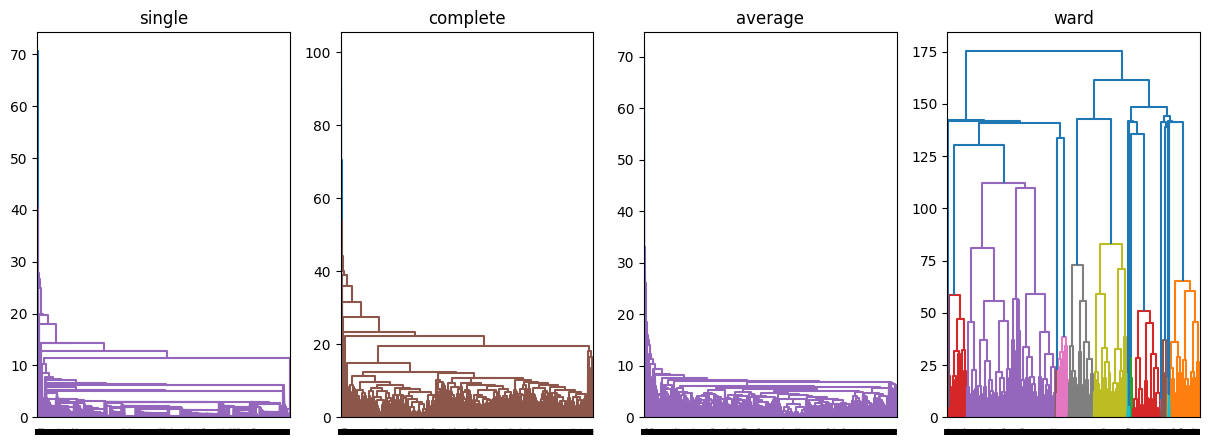

In [8]:
applyHiralricalClustering(scaled_sample_df, metric="euclidean")

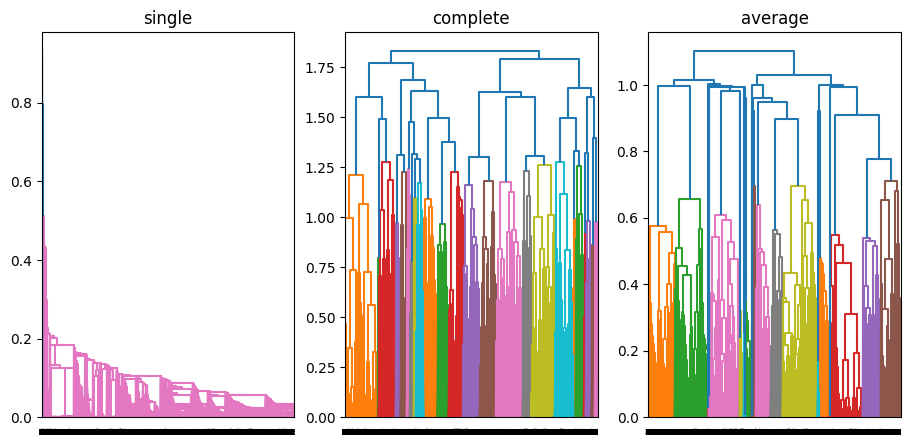

In [9]:
applyHiralricalClustering(scaled_sample_df, metric="cosine")

- Using the ward method, we can see that the dendrogram shows a clear separation of clusters at a height of around 50. This suggests that we can form distinct clusters of customers based on their hotel booking patterns and preferences.
- Changing the distance method shows how clustering changes.

### KMeans Algorithm

##### `KMeans with PCA`

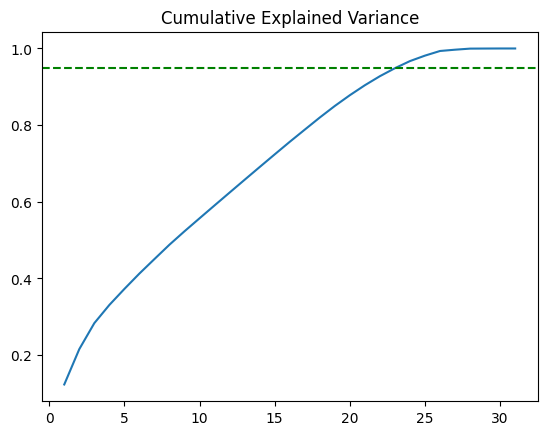

In [10]:
pca = PCA()
pcs = pca.fit_transform(scaled_sample_df)
varExplained = pca.explained_variance_ratio_

plt.plot(range(1, len(varExplained)+1), np.cumsum(varExplained))
plt.title("Cumulative Explained Variance")
plt.axhline(.95, ls='--', c='green')
plt.show()

- Amazing ratio of explained variance, we can use all the components. 

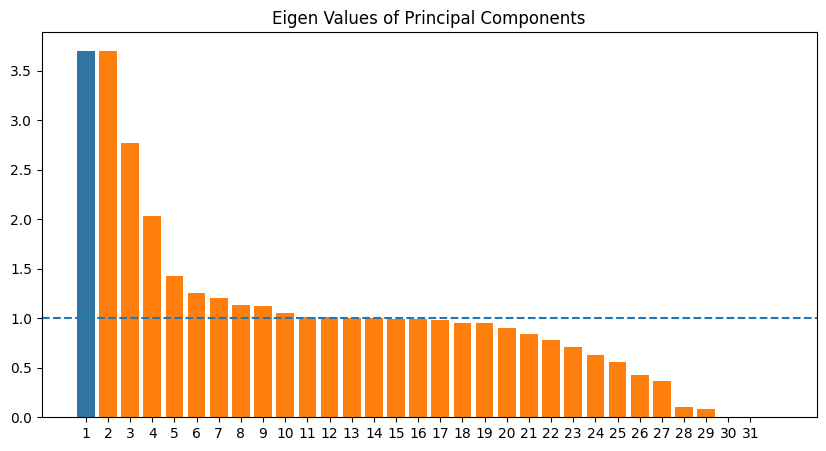

In [11]:
plt.figure(figsize=(10, 5))

raw_explained_variance = pca.explained_variance_
y = list(raw_explained_variance)
x = list(range(1,len(raw_explained_variance)+1))

sns.barplot(x=x, y=y)
plt.bar(x=x, height=y)
plt.axhline(y=1, ls="--")
plt.title("Eigen Values of Principal Components")
plt.show()

- The y=1 line is a visual cutoff to help decide how many principal components to keep based on Kaiser’s rule, so keeping 14 feature(pcs) is a good choice as 14 pcs good trade off for eigenvalue and cummulative variance.

In [12]:
# A new population gonna be created with 14 principal components
selected_pcs = pcs[:, :ClusteringModelsHyperparameters.PCA_COMPONENTS]
selected_pcs_df = pd.DataFrame(selected_pcs, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14"], index=scaled_sample_df.index)
selected_pcs_df = selected_pcs_df.reset_index(drop=True)

In [13]:
selected_pcs_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.615253,1.533264,-0.986426,2.583623,0.806432,-0.156173,0.423120,-0.381016,0.638966,0.178538,-0.355009,0.025904,-0.087442,0.218468
1,1.173973,0.796459,1.569635,-0.475650,2.586218,-0.263563,-1.305920,-0.034361,0.602157,-0.423201,0.736566,-0.330922,-0.154928,-0.494269
2,-2.514876,0.087991,-1.552141,1.283903,0.416025,0.405278,1.170216,-0.056532,0.993750,-0.076129,-0.298139,0.026310,0.016161,0.207794
3,-2.659603,0.079728,-0.612484,0.384616,-1.617860,1.594605,-0.990748,0.231594,0.014122,0.041131,-0.240867,-0.135273,-0.089600,-0.014333
4,0.834766,1.620103,1.572940,0.016195,-0.713213,-0.283666,0.281925,-0.214065,0.076370,0.155997,-0.069343,0.124633,0.020211,0.010295


In [14]:
selected_pcs_df.shape

(10000, 14)

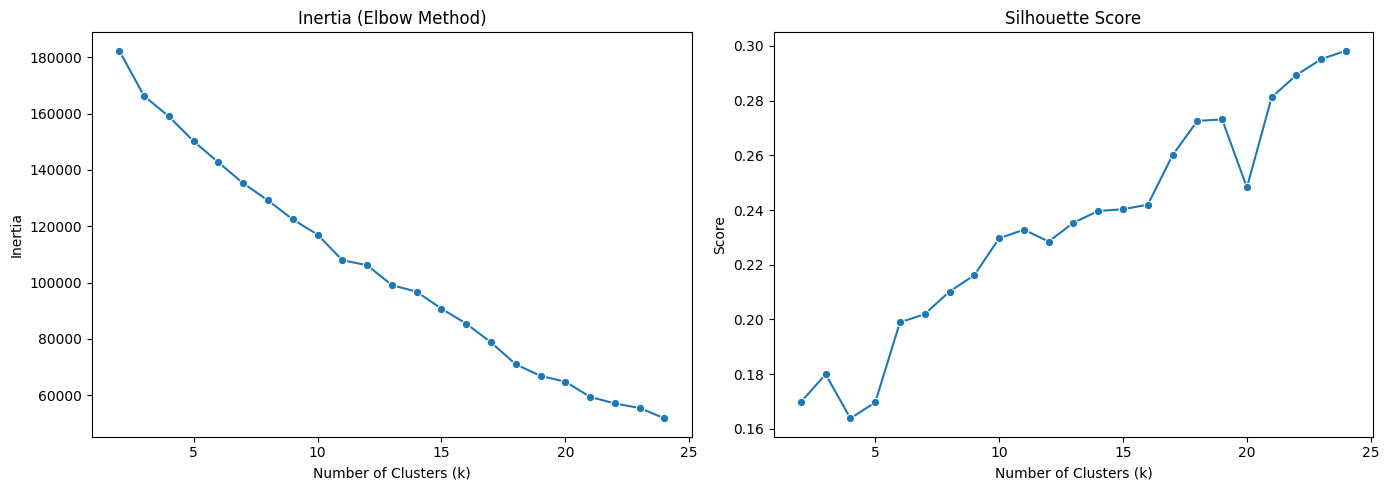

In [15]:
inertia, silhouette_scores = calculateKmeansMtrics(selected_pcs_df, ClusteringModelsHyperparameters.KMEANS_RAGE, ClusteringModelsHyperparameters.RANDOM_STATE)
plotKmeansMetrics(ClusteringModelsHyperparameters.KMEANS_RAGE, inertia, silhouette_scores)

- Observing different clusters and trying to find a balance between inertia and silohouette score.
- 10 clusters seems good to minimize intertia and maximize silo score.



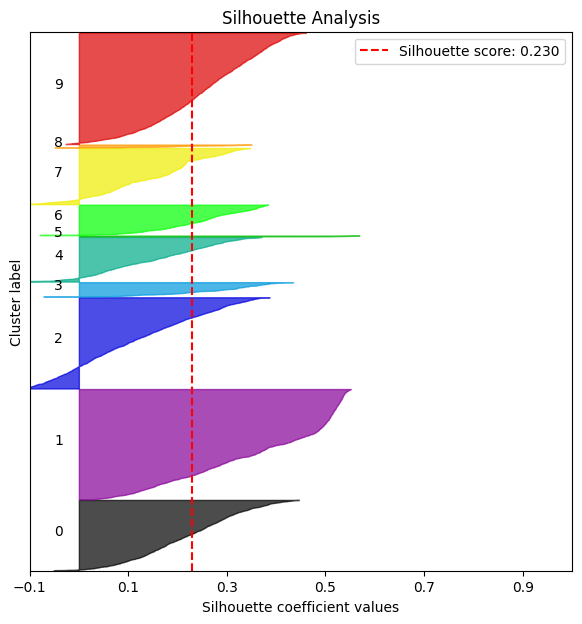

In [16]:
clsuter_labels = kmeansPredictClusters(selected_pcs_df, ClusteringModelsHyperparameters.KMEANS_N_CLUSTERS, ClusteringModelsHyperparameters.RANDOM_STATE)

skplt.metrics.plot_silhouette(selected_pcs_df, clsuter_labels, figsize=(7,7))
plt.show()

In [17]:
selected_pcs_df["CustomerCluster"] = clsuter_labels

In [18]:
selected_pcs_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,CustomerCluster
0,0.615253,1.533264,-0.986426,2.583623,0.806432,-0.156173,0.423120,-0.381016,0.638966,0.178538,-0.355009,0.025904,-0.087442,0.218468,6
1,1.173973,0.796459,1.569635,-0.475650,2.586218,-0.263563,-1.305920,-0.034361,0.602157,-0.423201,0.736566,-0.330922,-0.154928,-0.494269,9
2,-2.514876,0.087991,-1.552141,1.283903,0.416025,0.405278,1.170216,-0.056532,0.993750,-0.076129,-0.298139,0.026310,0.016161,0.207794,7
3,-2.659603,0.079728,-0.612484,0.384616,-1.617860,1.594605,-0.990748,0.231594,0.014122,0.041131,-0.240867,-0.135273,-0.089600,-0.014333,1
4,0.834766,1.620103,1.572940,0.016195,-0.713213,-0.283666,0.281925,-0.214065,0.076370,0.155997,-0.069343,0.124633,0.020211,0.010295,9


- I'm gonna use as well the tsn with pca and k-means clustering to see how it performs.

#### `KMeans With PCA and TSNE`

In [19]:
pca_tsne = PCA(n_components=ClusteringModelsHyperparameters.PCA_COMPONENTS)
scaled_sample_tsne_df = scaled_sample_df.copy()
pcs_tsne = pca.fit_transform(scaled_sample_tsne_df)

tsne=TSNE(ClusteringModelsHyperparameters.TSNE_COMPONENTS)
tsne.fit(pcs_tsne)

tsne_embeddings = tsne.embedding_

tsne_df = pd.DataFrame(tsne_embeddings, columns=["E1", "E2"])
tsne_df.head()

,E1,E2
0,-19.594017,10.927583
1,-31.619680,-30.662937
2,-53.977417,12.654507
3,-50.132099,48.288170
4,59.031719,-1.809731


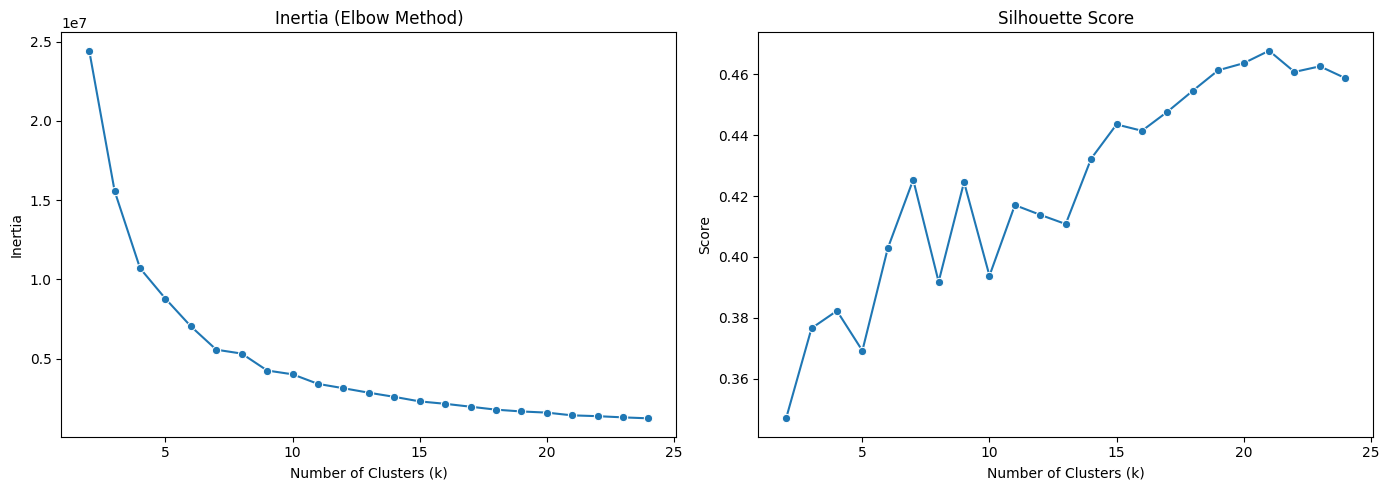

In [20]:
inertia, silhouette_scores = calculateKmeansMtrics(tsne_df, ClusteringModelsHyperparameters.KMEANS_RAGE, ClusteringModelsHyperparameters.RANDOM_STATE)
plotKmeansMetrics(ClusteringModelsHyperparameters.KMEANS_RAGE, inertia, silhouette_scores)

In [21]:
cluster_labels = kmeansPredictClusters(tsne_df, ClusteringModelsHyperparameters.KMEANS_N_CLUSTERS, ClusteringModelsHyperparameters.RANDOM_STATE)
tsne_df['CustomerCluster'] = cluster_labels
tsne_df.head()

,E1,E2,CustomerCluster
0,-19.594017,10.927583,4
1,-31.619680,-30.662937,4
2,-53.977417,12.654507,1
3,-50.132099,48.288170,1
4,59.031719,-1.809731,9


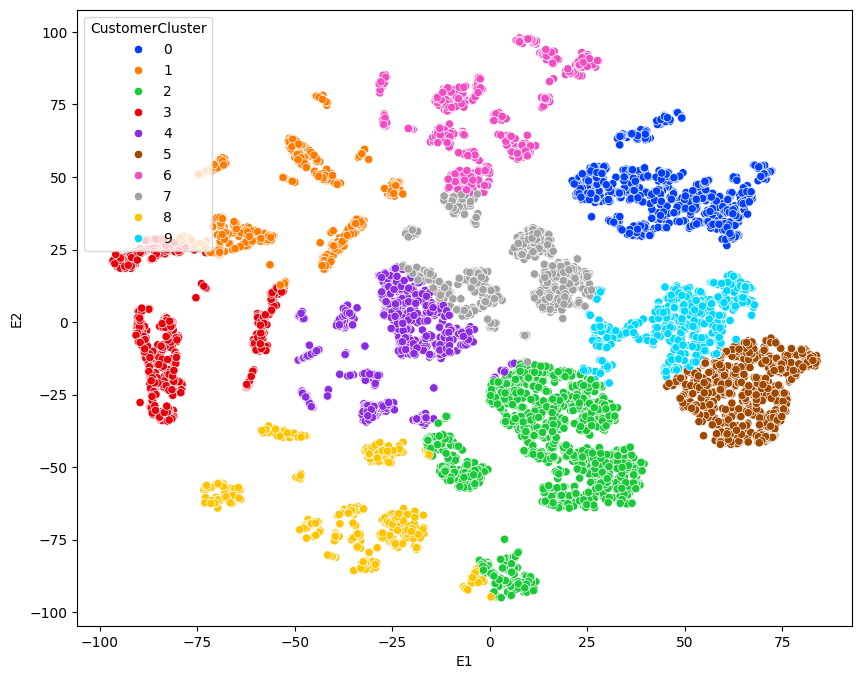

In [22]:
colorPalette = sns.color_palette("bright", ClusteringModelsHyperparameters.KMEANS_N_CLUSTERS)
plt.figure(figsize=(10,8))
sns.scatterplot(x="E1", y="E2", hue="CustomerCluster", data=tsne_df, legend="full", palette=colorPalette)
plt.show()

### Save Dataset

In [24]:
sample_df["CustomerSegmentation"] = cluster_labels

In [25]:
sample_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,CustomerSegmentation
0,31.0,794,7.0,452.0,34.0,0,0,1,4,4,...,0,0,0,0,0,1,0,0,0,4
1,30.0,728,16.0,408.0,92.0,0,0,1,8,4,...,0,0,1,0,0,0,0,1,0,4
2,63.0,85,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,21.0,2,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,48.0,808,57.0,299.4,111.6,0,0,1,6,2,...,0,0,0,0,0,0,0,1,0,9


In [26]:
sample_df.reset_index(drop=True, inplace=True)
sample_df.to_excel(f"{MAIN_DIR}/segmented_customers_dataset.xlsx")

### Conclusion

In this notebook, we successfully performed customer segmentation using clustering techniques to uncover distinct customer groups based on some data features. The workflow began with data exploration and preprocessing, ensuring the dataset was clean, consistent, and ready for analysis. We applied dimensionality reduction (PCA, and TSNE) to enhance visualization and improve clustering performance.

Aglomerative Clustering, and K-Means clustering were used as the primary segmentation methods. In Kmeans with the optimal number of clusters determined through evaluation metrics such as the **Elbow Method** (inertia) and **Silhouette Score**. The results are providing actionable insights about the customer segmentation.

---

### **Business Recommendations**
- **Targeted Marketing:** Design personalized campaigns tailored to the specific needs and behaviors of each segment.  
- **Loyalty Programs:** Create reward systems for high-value customer clusters to improve retention.  
- **Customer Re-engagement:** Develop strategies to re-activate low-engagement or dormant customer groups.  

---

**Future Improvements:**  
- Test alternative clustering algorithms (e.g., DBSCAN).  
- Incorporate additional customer features for richer segmentation.